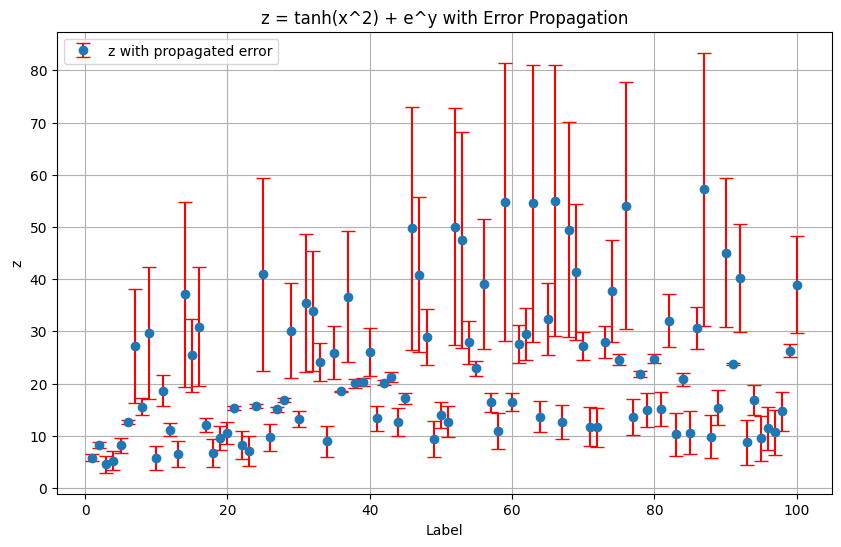

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute z and the propagated error
def compute_z_and_error(x, y, sigma_x, sigma_y):
    # Compute z = tanh(x**2) + e**y
    z = np.tanh(x**2) + np.exp(y)
    
    # Partial derivatives for error propagation
    dz_dx = 2 * x * (1 - np.tanh(x**2)**2)  # sech^2(x^2) = 1 - tanh^2(x^2)
    dz_dy = np.exp(y)
    
    # Error propagation: sigma_z^2 = (dz/dx * sigma_x)^2 + (dz/dy * sigma_y)^2
    sigma_z = np.sqrt((dz_dx * sigma_x)**2 + (dz_dy * sigma_y)**2)
    
    return z, sigma_z

# Load data from xnew.txt and ynew.txt
x_data = pd.read_csv('xnew.txt', delimiter='\t', header=None)
y_data = pd.read_csv('ynew.txt', delimiter='\t', header=None)

# Extract the columns
x = x_data[1].values  # second column is x
sigma_x = x_data[2].values  # third column is sigma_x
y = y_data[1].values  # second column is y
sigma_y = y_data[2].values  # third column is sigma_y

# Compute z and the propagated error
z, sigma_z = compute_z_and_error(x, y, sigma_x, sigma_y)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot z with error bars
plt.errorbar(x_data[0], z, yerr=sigma_z, fmt='o', label='z with propagated error', ecolor='red', capsize=5)

# Labels and title
plt.xlabel('Label')
plt.ylabel('z')
plt.title('z = tanh(x^2) + e^y with Error Propagation')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [29]:


# Create a DataFrame for checking the pairs and their respective sigmas
data_dict = {
    'x': x,
    'sigma_x': sigma_x,
    'y': y,
    'sigma_y': sigma_y,
    'z': z,
    'sigma_z': sigma_z
}

df = pd.DataFrame(data_dict)

# Save the data as CSV with a clean format (comma-separated)
df.to_csv("output_data.csv", index=False, float_format="%.5f")

print("Data saved successfully in CSV format")


Data saved successfully in CSV format
